## Lesson 6. Grouping data

**Introduction**. In lesson 5, we filtered based on one column of a data set, and then we examined that column. In lesson 6, we'll filter one column, and then examine another. This process is called *grouping*. In the baby names data, this might mean separating names of males and names of females, and then examining the distribution of first letters. We'll examine these groups using *subplots*: groups of plots that share an axis.

**Goal**. Use subplots to compare groups in the baby names data set.

### Grouping data

Are there differences in the first letters of names given to boys and girls? To answer this question, we'll need to *group* the baby names data.  

Grouping the data by sex means creating separate data frames for rows where `sex` is `M`, and where `sex` is `F`. This uses the same process as filtering from the previous lesson. In this lesson we're thinking of filtering as grouping, because we're comparing the results to each other-- we're comparing two different groups.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

df = pd.read_csv("https://raw.githubusercontent.com/dmoscoe/HCIS/main/csv/babynames.csv")
df = df.dropna()
boys_names = df[df['sex'] == 'M']
girls_names = df[df['sex'] == 'F']
boys_names.describe()

In [2]:
girls_names.describe()

,year,n,prop
count,59111.000000,59111.000000,59111.000000
mean,1975.409146,156.464804,0.000119
std,33.426762,1167.820206,0.000914
min,1880.000000,5.000000,0.000002
25%,1954.000000,7.000000,0.000004
50%,1985.000000,12.000000,0.000007
75%,2003.000000,31.000000,0.000022
max,2017.000000,73972.000000,0.066991


1. Based only on the descriptive statistics for the two different groups, what do you notice or wonder about how these two groups compare to each other?

*Sample response*: I notice that there are many more distinct girls' names than boys' names, and the most popular boys' names are more popular than the most popular girls' names. I can see this because the max `n` for boys is greater than the max `n` for girls.

2. How else might we divide the baby names data into different, non-overlapping groups?

*Sample response*: We could group the names by whether they begin with a vowel or not.

Are girls' names more likely to begin with certain letters? To answer this question, we'll look at a bar plot that measures how many girls in the data set have names that begin with each letter.

3. Why do we need a bar plot to visualize this instead of a histogram?

*Sample response*: We need to use a bar plot because our independent variable is a letter of the alphabet. Since this variable is not numeric, we cannot represent it on the number line axis of a histogram.

How can we instruct Python to group together all the girls whose names begin with a certain letter? We don't want to merely count the number of distinct names beginning with *A*, for example. Rather, we want to know, how many girls in this data set have a first name beginning with *A*?

4. Explain the difference between the fraction of girls' names that begin with *A*, and the fraction of girls whose name begins with *A*. Which are we interested in?

*Sample response*: The fraction of girls' names that begin with *A* has a denominator that is the total number of distinct names. The fraction of girls whose name begins with *A* has a denominator that is the total number of all girls surveyed in the data set. We're interested in the latter.

We want to group girls' names together by first letter. Then, we want to add up all the values in the `n` column for each group. The result will be a data frame with 26 rows. The value for `n` in this new data frame will be the total number of girls in the data set whose name begins with the given letter. Here's what it looks like:

In [3]:
girls_names = girls_names.groupby('first_letter').sum('n')
print(girls_names)

                    year       n      prop  first_is_vowel
first_letter                                              
A             12641438.0  808256  0.605003            6379
B              4106936.0  455585  0.347812               0
C              8100894.0  721218  0.476967               0
D              6906414.0  617843  0.443123               0
E              5172529.0  554049  0.530212            2635
F              1907413.0  107760  0.113049               0
G              2906072.0  205637  0.165123               0
H              1957468.0  151697  0.133234               0
I              1823174.0  109704  0.101442             924
J              8111911.0  876195  0.575564               0
K              7997857.0  532690  0.315158               0
L              9035497.0  676723  0.548025               0
M             11045724.0  993816  0.915366               0
N              3883928.0  239195  0.178343               0
O              1342650.0   34552  0.046573             6

5. Now that we've grouped the data, the meaning of the entries in each column is different. What do you think the values in the `year`, `prop`, and `first_is_vowel` columns represent? Are they meaningful?

*Sample response*: The data in the `year` column is not meaningful. Each entry is the sum of all the years for each name beginning with a particular letter. The data in the `prop` column are not meaningful. The data in the `first_is_vowel` are meaningful: they tell us the number of distinct names that begin with each vowel.

Let's take a look at the results.

Text(0.5, 1.0, "First letters of girls' first names")

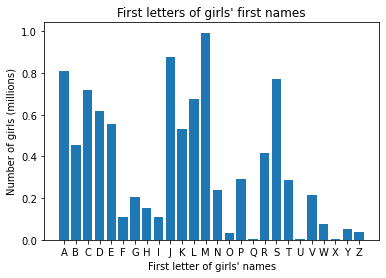

In [7]:
fig, axs = plt.subplots()
axs.bar(girls_names.index, girls_names['n']/1000000)
axs.set_xlabel("First letter of girls' names")
axs.set_ylabel("Number of girls (millions)")
axs.set_title(label = "First letters of girls' first names")

6. What conclusions can you draw from the bar plot? What questions does it raise for you?

*Sample response*: Some letters are much more popular than others. For example, there are many more girls whose first name begins with *M* than there are whose first name begins with *O*.

7. Generate the corresponding bar plot for boys' names.

Text(0.5, 1.0, "First letters of boys' first names")

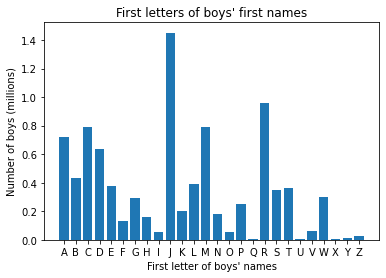

In [9]:
#Sample response:
boys_names = boys_names.groupby('first_letter').sum('n')
fig, axs = plt.subplots()
axs.bar(boys_names.index, boys_names['n']/1000000)
axs.set_xlabel("First letter of boys' names")
axs.set_ylabel("Number of boys (millions)")
axs.set_title(label = "First letters of boys' first names")

8. What conclusions can you draw from the bar plot? What questions does it raise for you?

*Sample response*: As with the girls' names, some letters are much more common than others. The letter *J* stands out as by far the most popular starting letter for a boy's name. Some letters that were relatively popular for girls, like *S*, and not so popular for boys.

9. What comparisons can you make between the two bar plots?

*Sample response*: The differences across the alphabet seem to be more extreme for boys' names. The popular letters are more popular, and the least popular letters are almost non-existent on the bar plot.

### Subplots

How could we create one plot that displays the distribution of first letters for both the boys' and the girls' names? There are several strategies available, but one is to create subplots.  

*Subplots* are separate plots that display related information. The way they're arranged helps the reader make comparisons among the data in different subplots. Our subplots will assist the reader in comparing the distribution of first letters for boys' names and girls' names. They'll do this by sharing a horizontal axis.  

Study the example that follows. Then use the example to help you group the baby name data in a different way. Use subplots to illustrate differences across your groups.

Text(0.5, 15.000000000000028, 'First letter of first name')

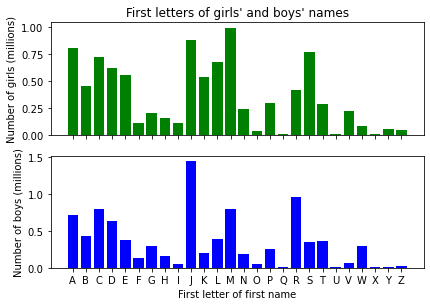

In [12]:
fig, axs = plt.subplots(2, 1, sharex = True)
    #The 2 represents the number of rows we'll arrange our subplots in.
    #The 1 gives the number of columns.
    #sharex = True means that these two subplots will share an x axis.

plt.tight_layout()
    #This tells Python to arrange the plots so that the y-axis labels do not overlap.

axs[0].bar(girls_names.index, girls_names['n']/1000000, color = 'green')
    #The 0 index on the axes object indicates that we're describing the
    #first subplot. (Remember the first element in a list has index = 0.)
    #We'll use different colors to emphasize that the two subplots are describing
    #different things.

axs[0].set_ylabel("Number of girls (millions)")
    #Notice that we always need to use an index to indicate the subplot we're describing.

axs[0].set_title("First letters of girls' and boys' names")

    #We omit an x-axis label for the first subplot, because that
    #information will be displayed below the second subplot. Similarly,
    #We place the title with the top subplot, and it describes the
    #information in both parts of the visualization.

axs[1].bar(boys_names.index, boys_names['n']/1000000, color = 'blue')
axs[1].set_ylabel("Number of boys (millions)")
axs[1].set_xlabel("First letter of first name")

10. What similarities and differences in boys' and girls' first initials are highlighted by using subplots?

*Sample response*: The relative change from one letter to it's neighbors is generally consistent across the boys' and girls' plots (for example, *E* is less common than *D*, which is less common than *C*). There are some striking differences in individual letters, like *S*, which is popular among girls and not very popular among boys. Very few children receive names beginning with *X*, which is disappointing.

11. Change the code above so that the subplots are side-by-side rather than stacked vertically. Which arrangement is better for comparing and contrasting these distributions?

*Sample response*: Vertically stacking these plots is more useful, because it allows for easier comparison across boys and girls for the same letter.

12. Based on all you've learned in this unit so far, decide on another way of grouping the baby names data. Create subplots that compare results across groups.

In [ ]:
#Sample response: (various.)